In [ ]:
!pip install numba

In [ ]:
from numba import jit
import numpy as np

#input = np.array(['a', 'b', 'a', 'a', 'b', 'a'])
#input = np.random.randint(low=0, high=2, size=100000)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def count_cycles(input):
  N = input.shape[0]
  num_cycles = np.full(N + 1, 0)
  links_curr = np.full(N, -1)
  links_prev = np.full(N, -1)
  # M = 1
  last_ind = {}
  for i in range(N):
    if input[i] in last_ind:
      links_curr[i] = last_ind[input[i]]
      num_cycles[1] += 1
    last_ind[input[i]] = i
  #print(links_curr)
  # M > 1
  for M in range (2, N):
    links_prev = links_curr
    links_curr = np.full(N - M + 1, -1)
    for i in range(N - M + 1):
      j = links_prev[i]
      while (j != -1):
        if (input[i + M - 1] == input[j + M - 1]):
          links_curr[i] = j
          break
        j = links_prev[j]
      if links_curr[i] != -1:
        num_cycles[M] += 1
    if num_cycles[M] == 0:
      break
    #print(links_curr)
  return num_cycles[1:]
#print(count_cycles(input))

In [ ]:
!pip install mne

In [ ]:
def zagrublenie(data,r): # функция от Степаняна
    d= [str(round(i*100000000)) for i in data]
    dn=[]
    for i in d:
        if i[0]=='-':
            znak='-'
            i=i[1:]
        else:
            znak='+'
        i=i[0:r]
        if len(i) == 5: dn.append(znak+i)
        if len(i) == 4: dn.append(znak+'0'+i)
        if len(i) == 3: dn.append(znak+'00'+i)
        if len(i) == 2: dn.append(znak+'000'+i)
        if len(i) == 1: dn.append(znak+'0000'+i)

    dn=[int(i) for i in dn]
    return dn

In [ ]:
zagrublenie([0.12345, 1.12345, 55.12345],2)

[12, 11, 55]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def main (fn):
    r=2# самое грубое округление до 4 потом 5
    N=4050 # длина слова
    out = {}
    data = mne.io.read_raw_edf(fn)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    print (info) #print (channels)
    L = len(channels)
    results=[]
    head, tail = os.path.split(fn)
    print(L, "channels")
    plt.figure(figsize=(16, 8))
    for i in range(L):
        data = raw_data[i]
        data = data# обрезка для демонстрации и ускоренного просчета
        #data_rounded = [round(j,r) for j in data]
        data_rounded = zagrublenie(data,r)
        data_rounded = np.array(data_rounded)
        num_cycles = count_cycles(data_rounded)
        plt.plot(np.array([i + 1 for i in range(num_cycles.shape[0])])[:6], num_cycles[:6], label=str(i))
    plt.title('График частоты подстрок')
    plt.xlabel('Размер подстроки')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

AhM_m_20_2/AhM_m_20_2_R1.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_R1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:11:46 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


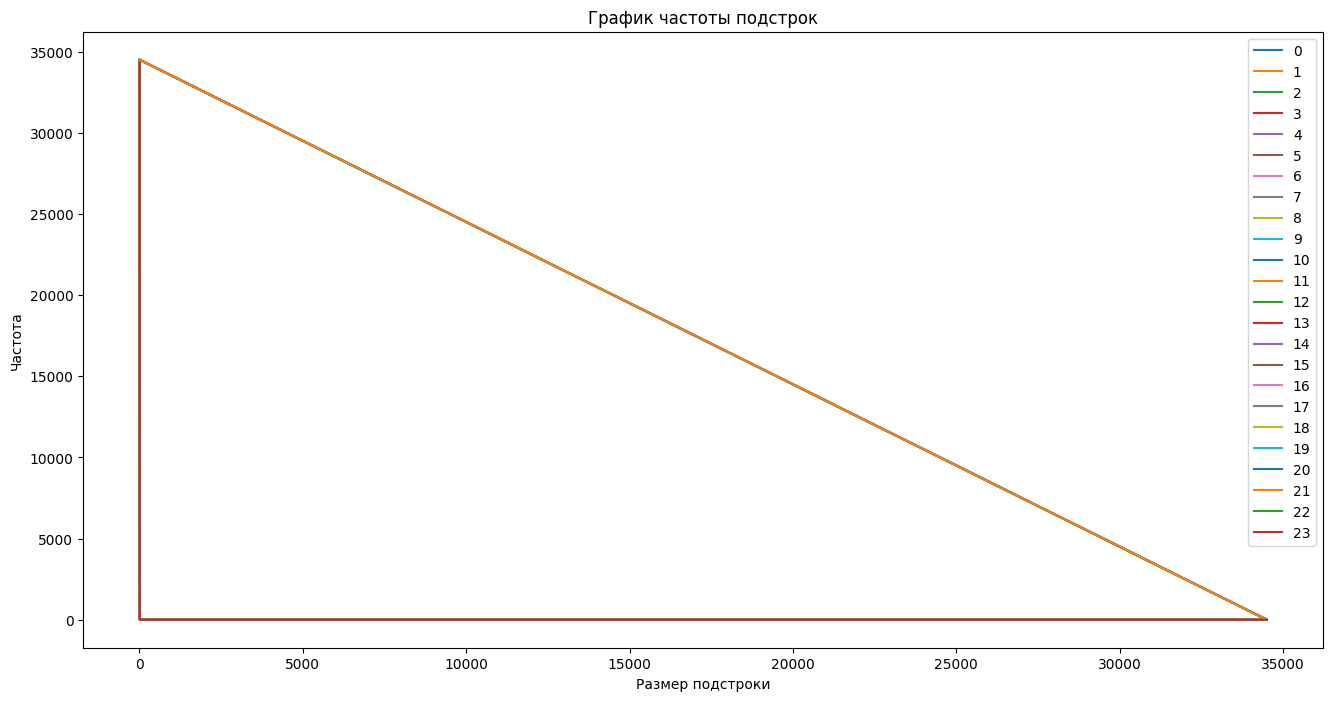

AhM_m_20_2/AhM_m_20_2_75.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_75.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:16:58 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


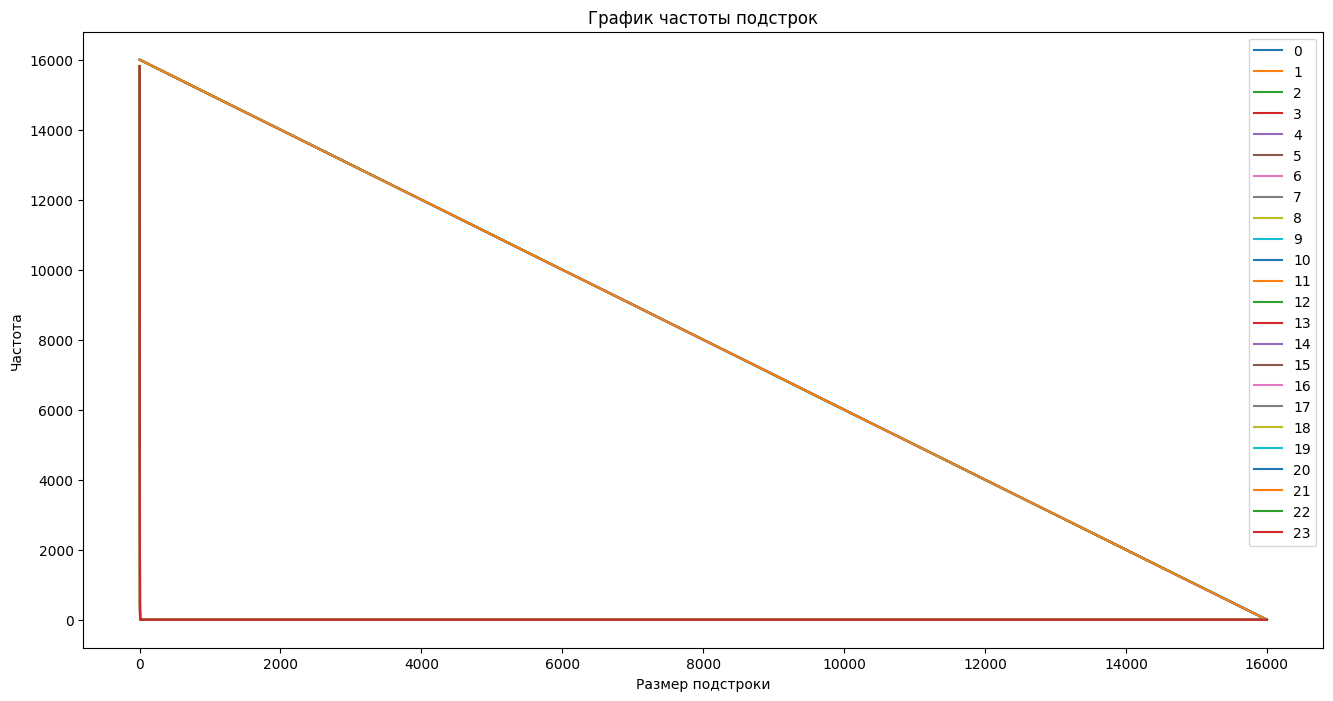

AhM_m_20_2/AhM_m_20_2_30.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:23:58 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


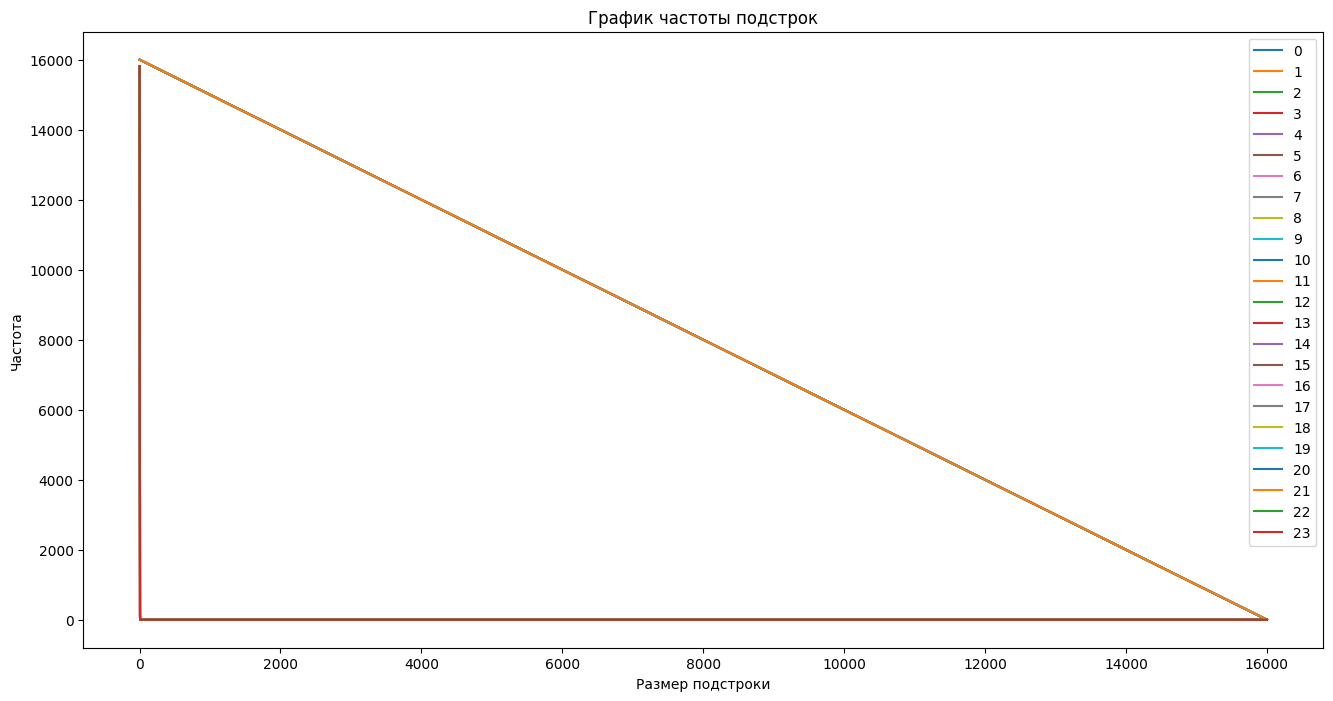

AhM_m_20_2/AhM_m_20_2_45.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:22:00 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


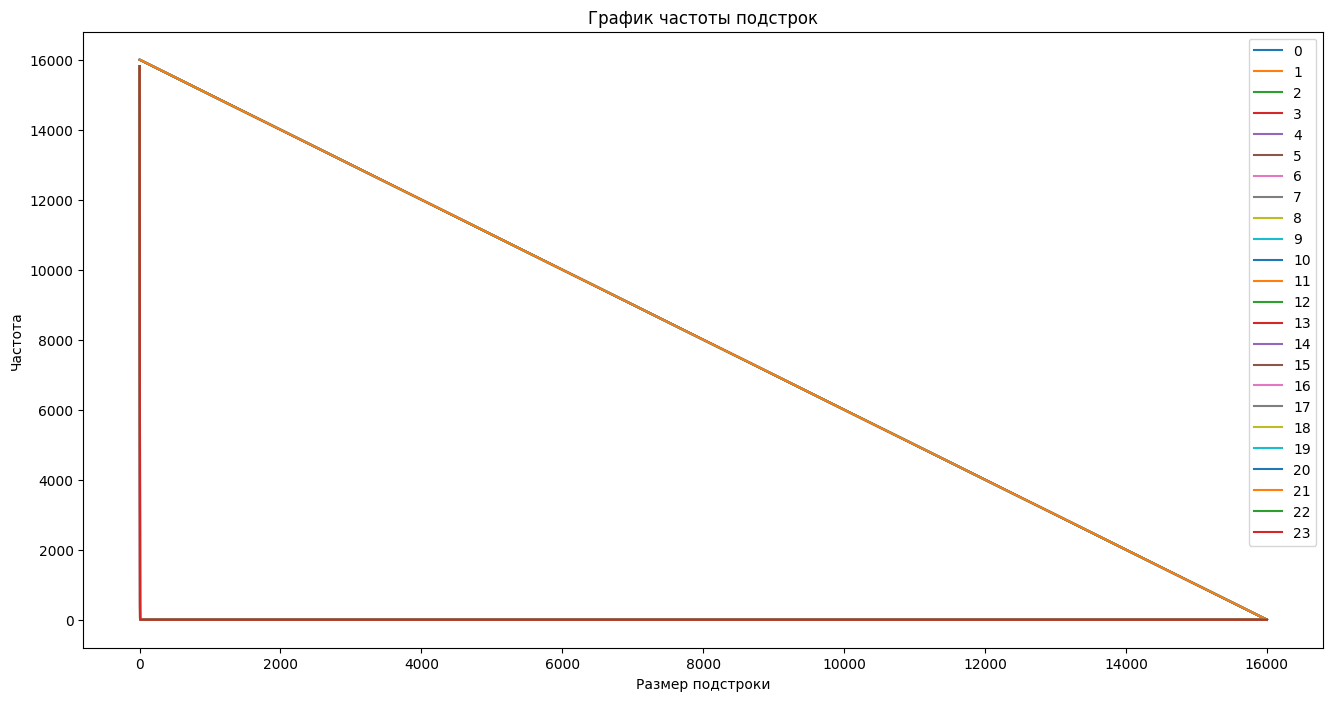

AhM_m_20_2/AhM_m_20_2_60.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:18:55 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


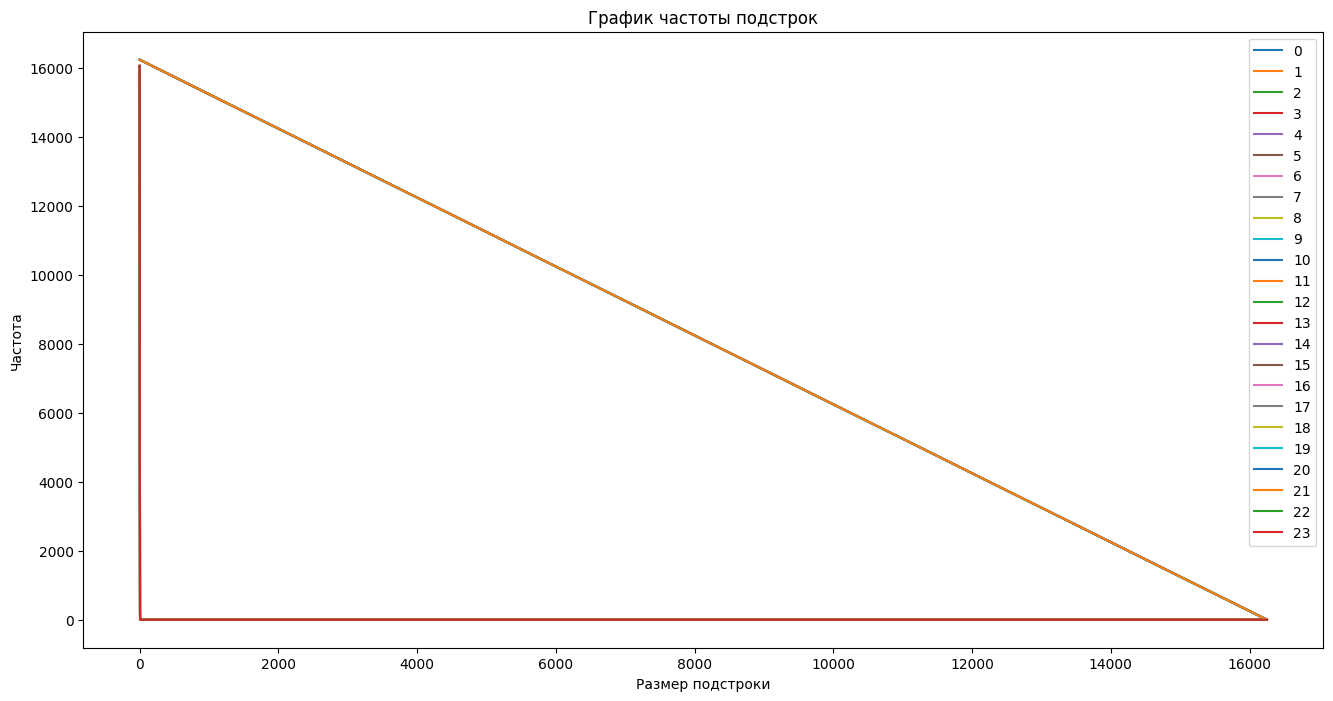

AhM_m_20_2/AhM_m_20_2_R2.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_R2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:29:17 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


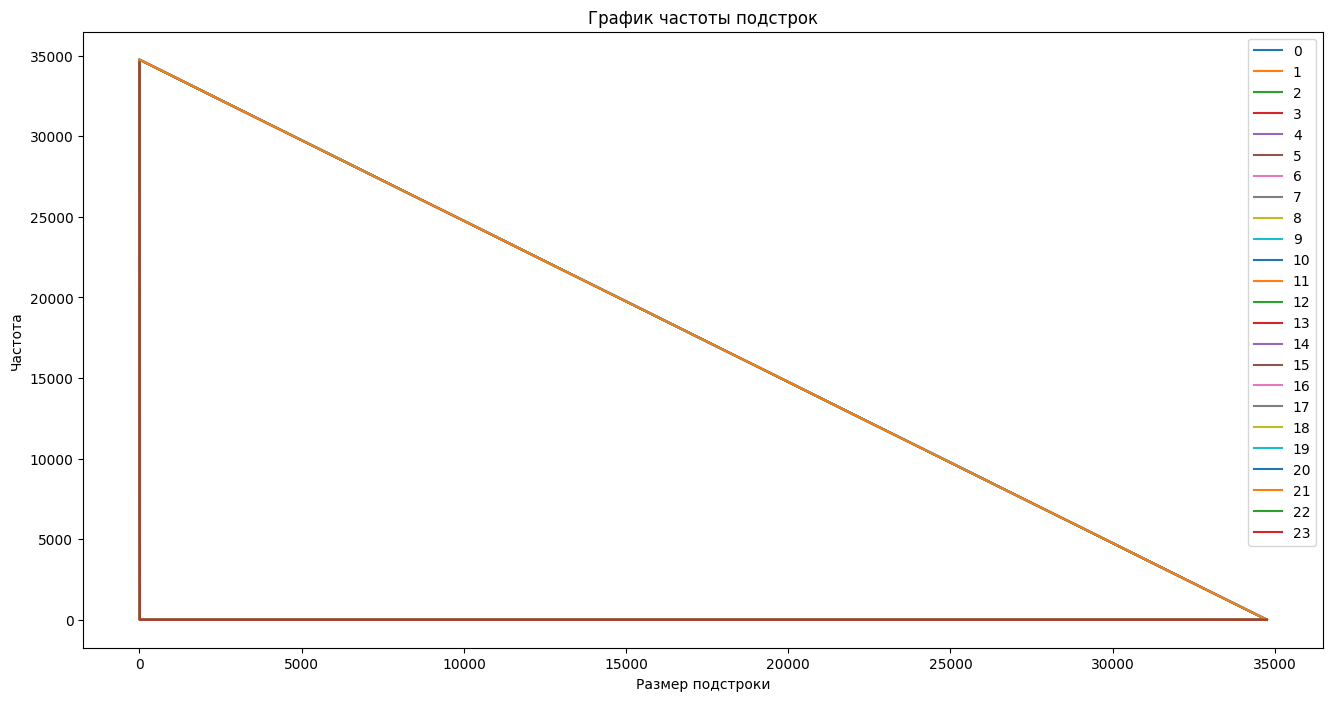

AhM_m_20_2/AhM_m_20_2_15.edf
Extracting EDF parameters from /content/AhM_m_20_2/AhM_m_20_2_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, EEG C3-Ref, ...
 chs: 24 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2019-04-30 12:26:04 UTC
 nchan: 24
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
24 channels


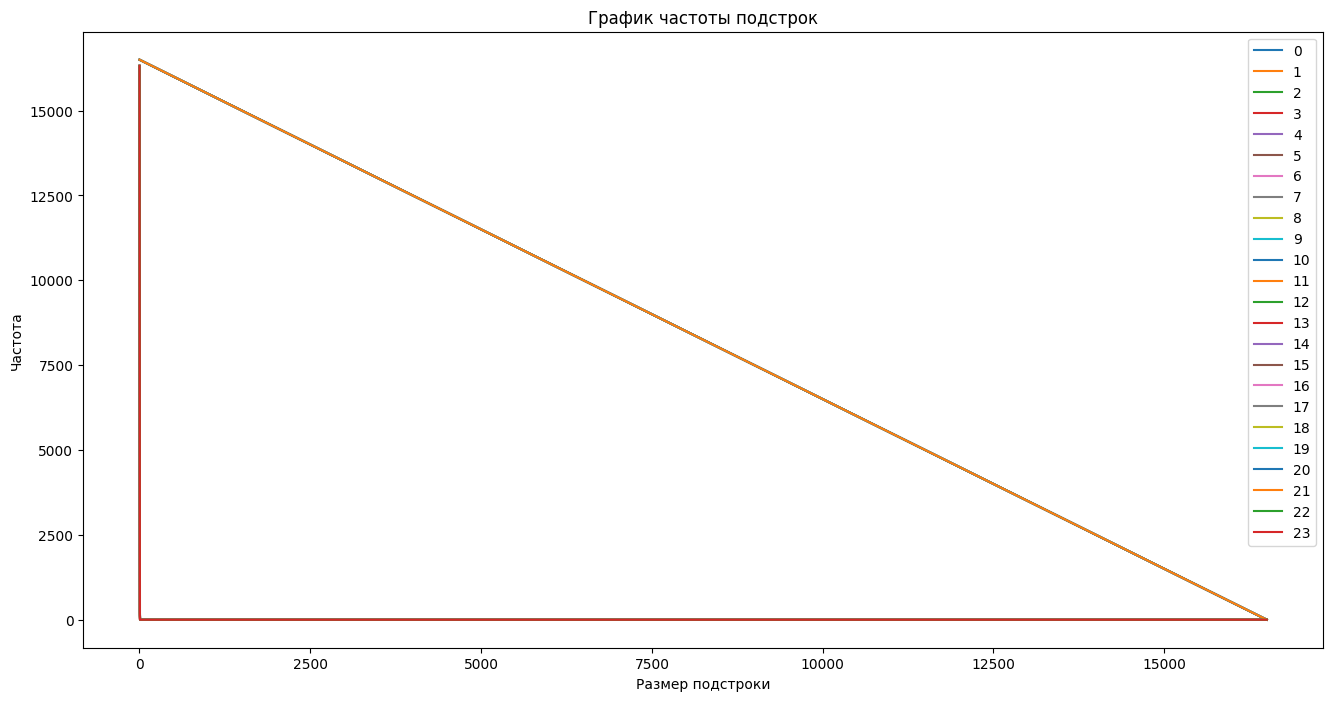

In [ ]:
import os
import glob
import json
import mne


root_dir ='AhM_m_20_2/' #needs a trailing slash (i.e. /root/dir/)
for fn in glob.iglob(root_dir + '**/*.edf', recursive=True):
    print(fn)
    main(fn)